In [75]:
#test loading and manipulaitng Argoverse Lidar datasets
# import av2 #ARGOVERSE API ONLY WORKS WITH PYTHON 3.8
import pandas as pd
import numpy as np
import pyarrow.feather as feather
import os
import sys
import inspect
from vedo import *
from ipyvtklink.viewer import ViewInteractiveWidget
from matplotlib import pyplot as plt

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from ICET_spherical import ICET

%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 180


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 180 seconds


In [8]:
fn1 = "D:/sensor/train/00a6ffc1-6ce9-3bc3-a060-6006e9893a1a/sensors/lidar/315967376859506000.feather"
fn2 = "D:/sensor/train/00a6ffc1-6ce9-3bc3-a060-6006e9893a1a/sensors/lidar/315967376959702000.feather"
df1 = feather.read_feather(fn1)
df2 = feather.read_feather(fn2)
df1

,x,y,z,intensity,laser_number,offset_ns
0,-1.291016,2.992188,-0.229370,24,31,3318000
1,-25.921875,25.171875,0.992188,5,14,3318000
2,-15.500000,18.937500,0.901855,34,16,3320303
3,-3.140625,4.593750,-0.163696,12,30,3320303
4,-4.445312,6.535156,-0.109802,14,29,3322607
...,...,...,...,...,...,...
98231,18.312500,-38.187500,3.279297,26,50,106985185
98232,23.109375,-34.437500,3.003906,20,49,106987490
98233,4.941406,-5.777344,-0.162720,12,32,106987490
98234,6.640625,-8.257812,-0.157593,6,33,106989794


In [177]:
#get ground truth for trajectory file
gtfn = "D:/sensor/train/00a6ffc1-6ce9-3bc3-a060-6006e9893a1a/city_SE3_egovehicle.feather"
gt = feather.read_feather(gtfn)#.to_numpy()
print(gt)
# print(np.shape(gt))
time = gt[{"timestamp_ns"}].to_numpy()
x = gt[{"tx_m"}].to_numpy()
y = gt[{"ty_m"}].to_numpy()
z = gt[{"tz_m"}].to_numpy()
gt = np.array([x, y, z])[:,:,0].T
# print(np.diff(gt, axis = 0))

np.sum(np.diff(gt, axis = 0)[:10], axis = 0)

            timestamp_ns        qw        qx        qy        qz         tx_m  \
0     315967376857428267 -0.229980  0.006656  0.005332  0.973158  1618.813592   
1     315967376859506000 -0.229645  0.006644  0.005351  0.973237  1618.799155   
2     315967376862451246 -0.229143  0.006649  0.005323  0.973355  1618.778615   
3     315967376872412942 -0.227541  0.006584  0.005327  0.973732  1618.705761   
4     315967376877482498 -0.226704  0.006578  0.005299  0.973927  1618.670350   
...                  ...       ...       ...       ...       ...          ...   
2684  315967392777482492 -0.167578 -0.001978  0.022760  0.985594  1541.729693   
2685  315967392787425440 -0.167578 -0.001935  0.022770  0.985594  1541.703178   
2686  315967392792441184 -0.167583 -0.001932  0.022770  0.985593  1541.688735   
2687  315967392799927213 -0.167569 -0.001953  0.022754  0.985596  1541.667139   
2688  315967392799927216 -0.167569 -0.001953  0.022754  0.985596  1541.667139   

            ty_m       tz_m

array([-0.38138971, -0.19221579,  0.0073709 ])

<IPython.core.display.Javascript object>


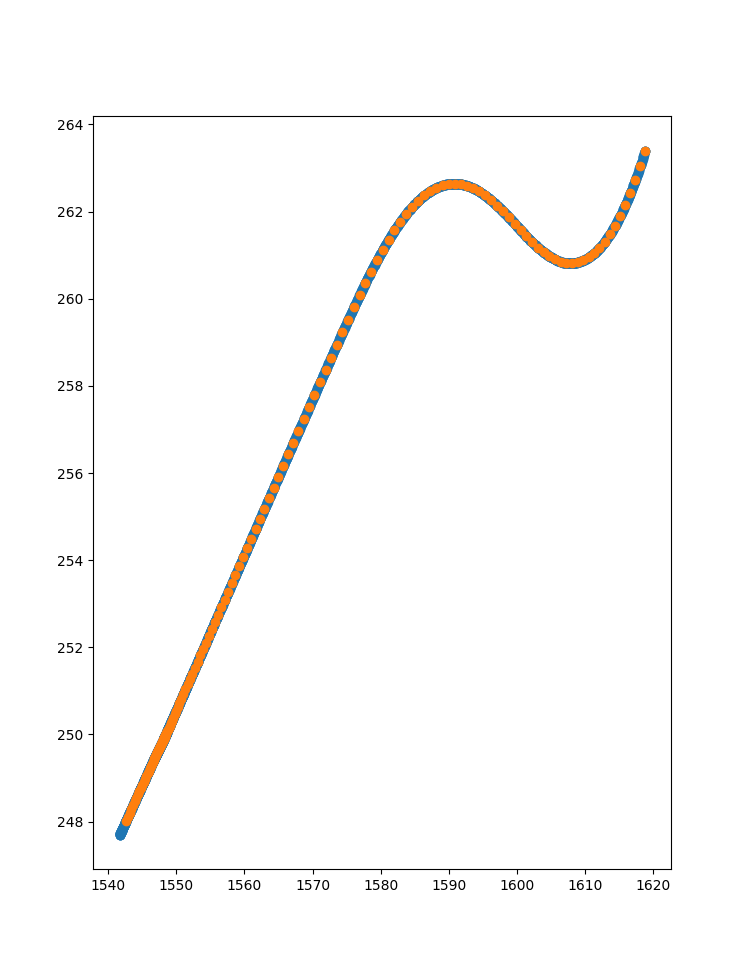

In [208]:
#plot all points in gt
fig, ax = plt.subplots()
ax.scatter(gt[:,0], gt[:,1])
ax.scatter(gt_lidar[:,0], gt_lidar[:,1])

In [132]:
#loop though all ~150 frame lidar datasets
path = "D:/sensor/train/"
list_subfolders_with_paths = [f.path for f in os.scandir(path) if f.is_dir()]
#loop through each folder in subfolder paths
# for i in range(len(list_subfolders_with_paths)):
#     print(list_subfolders_with_paths[i])

In [222]:
#loop though each lidar frame 
path = "D:/sensor/train/00a6ffc1-6ce9-3bc3-a060-6006e9893a1a/sensors/lidar/" #big city

gt_lidar = np.zeros([0,3])
count = 0
for file in os.listdir(path):
    #find ground truth pose recorded closest to this lidar timestamp
    t_lidar = int(file[:-8])
#     print(t_lidar)
#     print(np.where(time == t_lidar))
#     print(gt[18])
#     print(gt[np.where(time == t_lidar)[0]])
    gt_lidar = np.append(gt_lidar, gt[np.where(time == t_lidar)[0]], axis = 0)
#     print(gt_lidar)

    #read in point cloud
#     f = feather.read_feather(path + file)
    count += 1
    if count == 10:
        break
        
# print(gt_lidar)

dgt_lidar = np.diff(gt_lidar, axis = 0)
print(dgt_lidar)
print(np.sqrt(np.sum(dgt_lidar**2, axis = 1))) #absolute movement per frame in horizontal plane

[[-0.72035916 -0.35091291  0.00548085]
 [-0.71655235 -0.32100592  0.00939555]
 [-0.73596352 -0.30102017  0.00386007]
 [-0.73084447 -0.27032375  0.01075214]
 [-0.75168966 -0.24895652  0.00865084]
 [-0.74950584 -0.22495121  0.01384649]
 [-0.76328546 -0.19662315  0.00975292]
 [-0.76214292 -0.17080357  0.01126534]
 [-0.77823047 -0.14987004  0.00871194]]
[0.80130346 0.7852263  0.79515429 0.77931007 0.79189111 0.78265814
 0.78826422 0.78112905 0.79257782]


In [123]:
pts1 = df1[{'x', 'y', 'z'}].to_numpy()
pts2 = df2[{'x', 'y', 'z'}].to_numpy()
# print(pts1) #need to swqp x and z for some reason
pts1 = np.array([pts1[:,2], pts1[:,1], pts1[:,0]]).T
pts2 = np.array([pts2[:,2], pts2[:,1], pts2[:,0]]).T
# print(pts1) #need to swqp x and z for some reason


In [220]:
ground = 0.3
pts1 = pts1[pts1[:,2] > ground ]
pts2 = pts2[pts2[:,2] > ground ]

it1 = ICET(cloud1 = pts1, cloud2 = pts2,  fid = 120, draw = True, 
            niter = 8, group= 2, RM = False, DNN_filter = False)

it1.plt.show(it1.disp, "Figure 2", resetcam = False)
ViewInteractiveWidget(it1.plt.window)


 estimated solution vector X: 
 tf.Tensor([0. 0. 0. 0. 0. 0.], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([ 0.00048306  0.73110116 -0.0032494  -0.00017192 -0.0011725   0.03050983], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([ 0.00444209  0.7886754  -0.00027761  0.00047818 -0.00066885  0.03401585], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00101737  0.7906771  -0.00006614  0.00069589 -0.00059175  0.03417973], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00139754  0.79083025  0.00032038  0.0007529  -0.00059345  0.03418253], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00142278  0.7908803   0.00051379  0.00076071 -0.00059205  0.03418192], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Tensor([-0.00143367  0.79088056  0.00064317  0.00076113 -0.00058811  0.03418163], shape=(6,), dtype=float32)

 estimated solution vector X: 
 tf.Ten

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)